### Import the libraries 


In [112]:
import numpy as np 
import matplotlib.pyplot as plt

### Cargamos los datos 

In [113]:
coordinates = {}
maze = []
with open ('maze2.txt', 'r') as f:
    for line in f:
        maze.append(line.strip())
        print(line.strip())
    
rows = len(maze[0])
cols = len(maze)-1

#############
#S          #
### # # ### #
#   # # #   #
# ### ### ###
#     #     #
##### # #####
#   # #   ###
# ### ###   #
#     #   E #
#############



In [114]:
maze_dict = {}
for i in range(cols):
    for j in range(rows):
        maze_dict[(i,j)] = maze[i][j]

In [115]:
def generate_maze_image(maze_dict):
    
    max_row = max(maze_dict.keys(), key = lambda x: x[0])[0]+1
    max_col = max(maze_dict.keys(), key = lambda x: x[1])[1]+1

    image = np.zeros((max_row, max_col, 3), dtype = np.uint8)

    colors = {'#': [0,0,0], ' ': [255,255,255], 'S': [0,255,0], 'E': [255,0,0]}

    for (row,col), state in maze_dict.items():
        color = colors.get(state, [255,255,255])
        image[row, col] = color

    plt.imshow(image)
    plt.axis('off')
    plt.title('Maze Visualization')
    plt.show()


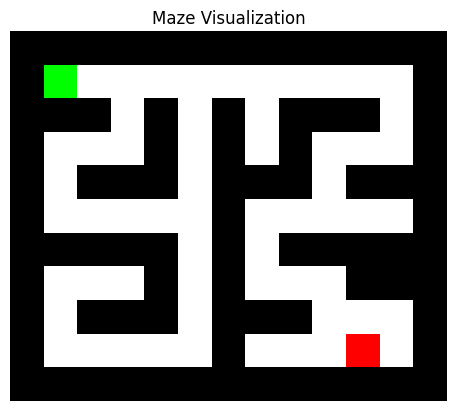

In [116]:
generate_maze_image(maze_dict)

In [ ]:
class Agent:
    def __init__(self, maze_dict):
        self.maze_dict = maze_dict
        self.current_position = self.get_position('S')
        self.end_position = self.get_position('E')
    
    def get_position(self, state):
        for position, value in self.maze_dict.items():
            if value == state:
                return position
    
    def get_possible_moves(self, position):
        x, y = position
        moves = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        valid_moves = []
        for move in moves:
            if self.maze_dict.get(tuple(move)) != '#':
                valid_moves.append(move)
        return valid_moves
     
    def bfs(self):
        visited = []
        queue = [[self.current_position]]
        while queue:
            path = queue.pop(0)
            node = path[-1]

            if node not in visited:
                possible_moves = self.get_possible_moves(node)
                for move in possible_moves:
                    new_path = list(path)
                    new_path.append(move)
                    queue.append(new_path)
                    if move == self.end_position:
                        return new_path
                visited.append(node)
        return None


In [138]:
agente1 = Agent(maze_dict)
print(agente1.get_possible_moves(agente1.current_position))


[(1, 2)]


In [142]:
path = agente1.bfs()
print(path)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 11), (3, 11), (3, 10), (3, 9), (4, 9), (5, 9), (5, 8), (5, 7), (6, 7), (7, 7), (7, 8), (7, 9), (8, 9), (9, 9), (9, 10)]


In [143]:
# Visualize the path


def Visualize_path(path, maze_dict):
    max_row = max(maze_dict.keys(), key = lambda x: x[0])[0]+1
    max_col = max(maze_dict.keys(), key = lambda x: x[1])[1]+1

    image = np.zeros((max_row, max_col, 3), dtype = np.uint8)

    colors = {'#': [0,0,0], ' ': [255,255,255], 'S': [0,255,0], 'E': [255,0,0], 'X': [0,0,255]}

    for (row,col), state in maze_dict.items():
        color = colors.get(state, [255,255,255])
        image[row, col] = color

    
    for position in path:
        image[position] = colors['X']

    plt.imshow(image)
    plt.axis('off')
    plt.title('Maze Visualization')
    plt.show()
    


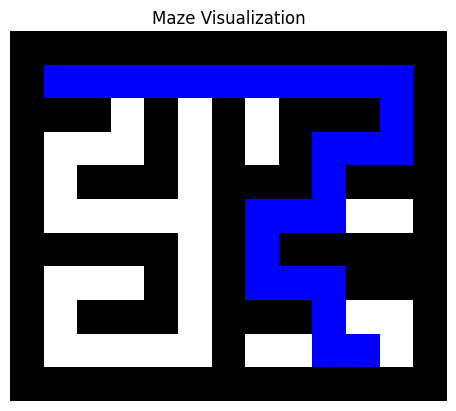

In [145]:
Visualize_path(path, maze_dict)